In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8647 - loss: 0.4756 - val_accuracy: 0.9557 - val_loss: 0.1476
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9633 - loss: 0.1216 - val_accuracy: 0.9657 - val_loss: 0.1110
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9760 - loss: 0.0762 - val_accuracy: 0.9692 - val_loss: 0.1070
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9710 - val_loss: 0.1018
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9857 - loss: 0.0445 - val_accuracy: 0.9711 - val_loss: 0.1022
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9882 - loss: 0.0352 - val_accuracy: 0.9744 - val_loss: 0.0937
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9907 - loss: 0.0264 - val_accuracy: 0.9763 - val_loss: 0.0916
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9936 - loss: 0.0197 - 

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.1025
Test Accuracy: 0.9779999852180481


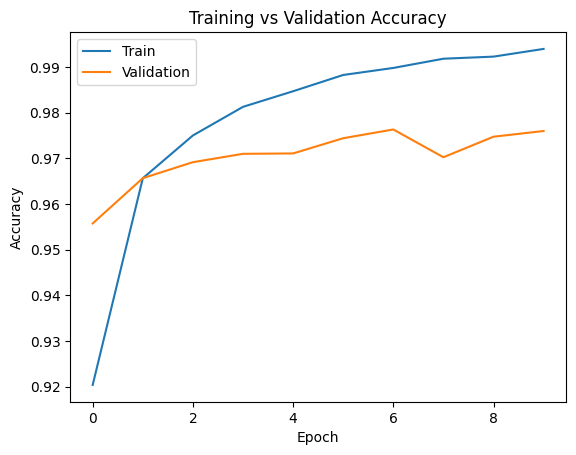

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Digit: 7


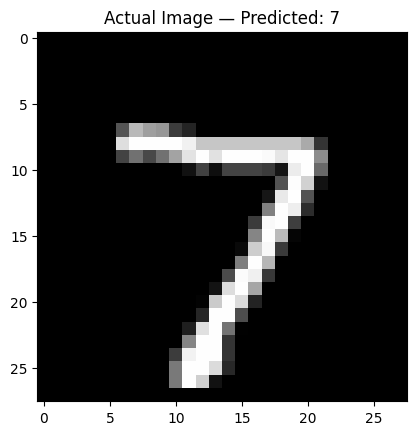

In [12]:
idx = 0
sample = X_test[idx].reshape(1,28,28)
prediction = model.predict(sample)

print("Predicted Digit:", prediction.argmax())
plt.imshow(X_test[idx], cmap='gray')
plt.title(f"Actual Image — Predicted: {prediction.argmax()}")
plt.show()